## Exploring a Data Set

* Looking for anomalies and data integrity problems
* Cleaning data
* Massaging data format to be model-ready
* Choosing features and a target
* Train/test split

In [512]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [513]:
# Read the data
path = join('data', 'train.csv')
people = pd.read_csv(path)

# Drop unused column
people.drop('Name', axis=1, inplace=True)
people.drop('Cabin', axis=1, inplace=True)
people.drop('Ticket', axis=1, inplace=True)


In [514]:
people.describe(include=['int', 'int64', 'float', 'object'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [515]:
# list coloums with missing values
people.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [516]:
# taking care of missing values 
# Method 1: drop entries with missing vaues, if the number of entries with missing values is about 1% of total number of entries

# people = people.dropna()

# Method 2: fill the missing values with the mean, mode or median
#   For usual practice, it is preferred to use df.fillna(df.mean(), inplace=True) for columns having continuous values 
#   and df.fillna(df.mode()[0], inplace=True) for categorical values.


mean_age = people['Age'].mean(skipna=True)
people[['Age']] = people[['Age']].fillna(value=mean_age)

mode_embarked = people['Embarked'].mode()[0]
people[['Embarked']] = people[['Embarked']].fillna(value=mode_embarked)


In [517]:
# list coloums with missing values
people.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [518]:
people.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [519]:
# one-hot encoding
people_dummies = pd.get_dummies(people)

In [520]:
people_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [521]:
# separating the features and target
y = people_dummies['Survived']
X = people_dummies.drop('Survived', axis=1)

In [522]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)

Training features/target: (668, 11) (668,)
Testing features/target: (223, 11) (223,)


## Classification

* Choosing a model
* Feature importances
* Cut points in a decision tree
* Comparing multiple classifiers

In [523]:
# searching for the best maxdepth and random state 
# can use high level API using [sklearn.model_selection.GridSearchCV] or a simple for loop for simple scenarios

max_score, best_n, best_r = 0,0,0

for n in range(1,20):
    for r in range(0,10):
        tree = DecisionTreeClassifier(max_depth=n, random_state=r)
        tree.fit(X_train, y_train)
        if tree.score(X_test, y_test) > max_score:
            max_score = tree.score(X_test, y_test)
            best_n = n
            best_r = r


print(best_n, best_r, max_score)


3 0 0.8026905829596412


In [524]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8026905829596412

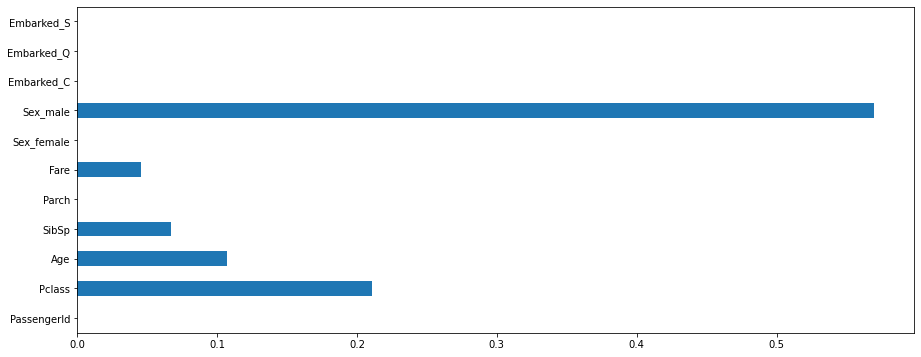

In [529]:
#feature importance
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(15,6));

In [530]:
# To check if the model has learned anything from the data

from sklearn.dummy import DummyClassifier
for strategy in ['most_frequent', 'stratified', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy, random_state=2)
    dummy.fit(X_train, y_train)
    score = dummy.score(X_test, y_test)
    print("{:<15}| score = {:.3f}".format(strategy, score))

most_frequent  | score = 0.574
stratified     | score = 0.462
prior          | score = 0.574
uniform        | score = 0.538


In [442]:
# comparision of many classifiers in scikit-learn

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=3,random_state=0), 
    "Random Forest": RandomForestClassifier(max_depth=12, n_estimators=4, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}

from time import time
nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.538 | time = 0.001s/0.001s
KNN(3)         | score = 0.570 | time = 0.001s/0.005s
RBF SVM        | score = 0.574 | time = 0.010s/0.006s
Decision Tree  | score = 0.803 | time = 0.001s/0.001s
Random Forest  | score = 0.798 | time = 0.007s/0.001s
Neural Net     | score = 0.771 | time = 0.099s/0.001s
AdaBoost       | score = 0.771 | time = 0.030s/0.003s
Naive Bayes    | score = 0.776 | time = 0.001s/0.001s
QDA            | score = 0.668 | time = 0.001s/0.001s
Linear SVC     | score = 0.726 | time = 0.023s/0.001s


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [547]:
max_score, best_n, best_e, best_r = 0, 0, 0, 0

for n in range(1,20):
    for e in range(1,20):
            for r in range(0,20):
                    tree = RandomForestClassifier(max_depth=n, n_estimators=e, random_state=r)
                    tree.fit(X_train, y_train)
                    if tree.score(X_test, y_test) > max_score:
                        max_score = tree.score(X_test, y_test)
                        best_n = n
                        best_e = e
                        best_r = r

print(f"max_depth={best_n}, n_estimators={best_e}, random_state={best_r} /t  score={max_score}")

max_depth=4, n_estimators=4, max_features=9, random_state=11 /t  score=0.820627802690583


In [548]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier(max_depth=12, n_estimators=4,random_state=1)
rfClassifier.fit(X_train, y_train)
rfClassifier.score(X_test, y_test)

0.820627802690583

In [443]:
# checking feature importance
tree = DecisionTreeClassifier(max_depth=7, random_state=0).fit(X_train, y_train)
pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(7)

Sex_male       0.422197
Age            0.162368
Pclass         0.160732
PassengerId    0.086624
Fare           0.086265
SibSp          0.063921
Embarked_S     0.009131
dtype: float64

### Preparing submission

In [549]:
# Read the test data
test_path = join('data', 'test.csv')
test_people = pd.read_csv(test_path)

# Drop unused column
test_people.drop({'Name', 'Cabin', 'Ticket'}, axis=1, inplace=True)

In [550]:
test_people.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare            True
Embarked       False
dtype: bool

In [551]:
test_mean_age = test_people['Age'].mean(skipna=True)
test_people[['Age']] = test_people[['Age']].fillna(value=test_mean_age)

test_mean_fare = test_people['Fare'].mean(skipna=True)
test_people[['Fare']] = test_people[['Fare']].fillna(value=test_mean_fare)

test_people.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [552]:
XX_test = pd.get_dummies(test_people)
XX_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
submission_dict = {
    'PassengerId': [],
    'Survived': []
}

for index, row in XX_test.iterrows():
    submission_dict['PassengerId'].append(int(row['PassengerId']))
    submission_dict['Survived'].append(rfClassifier.predict([row])[0])

submission_df = pd.DataFrame(submission_dict)
submission_df.to_csv("submission.csv", index=False, header=True)